# Programming For Data Analysis Project 2021.

## Name: Sam Tracey
## Student ID: G00398245
## Date: January 2021

***

# Introduction.

The purpose of this project is to create a simulated data set based on a real-world phenomenon. Simulated data is synthetic data that is generated via algorithms rather than data that have been collected in the "real-world". The value in simulated data is that it can accurately reflect real world phenomenon mathematically or statistically and, in the Machine Learning Industry it has been found to be as good or even better at training AI models than it's real world counterpart. [1]

The challenge for us then is to create a synthetic, simulated data set which is represenatative of a real-world phenomenon based on available research and literature.


## Real World Phenomenon.

I have decided to generate a data set based on lifestyle factors that may increase a person's probability of having heart disease in Ireland.
Based on data from the Central Statistics Office (2020) heart attacks and strokes are two of the leading causes of mortality in Ireland with 8744 lives being lost to these conditions in 2020.[2]
The underlying cause of heart disease, heart attacks and strokes is atherosclerosis (the build up of fatty deposits that form plaques on the inner lining of the blood vessels).[3] The following lifestyle factors have been found to increase the chances of heart attacks [4]:

- Age
- Gender
- Smoking
- High Blood Pressure
- Diabetes
- Alcohol Consumption
- Physical Inactivity
- High Cholesterol
- Obesity
- Unrelieved Stress

Much of the research required for this project is available in the "Health Ireland Survey Report 2021" a copy of which is available [here](http://localhost:8888/files/Data/Health_Ireland_Survey_2021.pdf?_xsrf=2%7Cf7a4eb77%7Cdc69a39ecbea7f6855547c6189bce090%7C1637500309).

Our simulated dataset will contain 5000 entries and 9 fields. We will use <code>numpy.random</code> extensively to generate data for each field based on available research.

In [1]:
# Data Analysis and data manipulation.
import pandas as pd
# Scientific and mathematical computing.
import numpy as np
# Basic plotting package.
import matplotlib.pyplot as plt
# Advanced Plotting package.
import seaborn as sns

In [2]:
# Create our dataframe with relevant headers.
df = pd.DataFrame(columns=['Age', 'Gender', 'Smoker', 'High BP', 'Diabetes', 'Alcohol', 'Inactivity', 'BMI', 'Hi Cholesterol'])

## Simulating Age.

The variable age is a continuous integer and, for the purpises of our dataset we will only consider ages between 18 and 99 (inclusive). When we look at the age distribution for Ireland published after the 2016 census we see that it does not follow a normal distribution [5]:

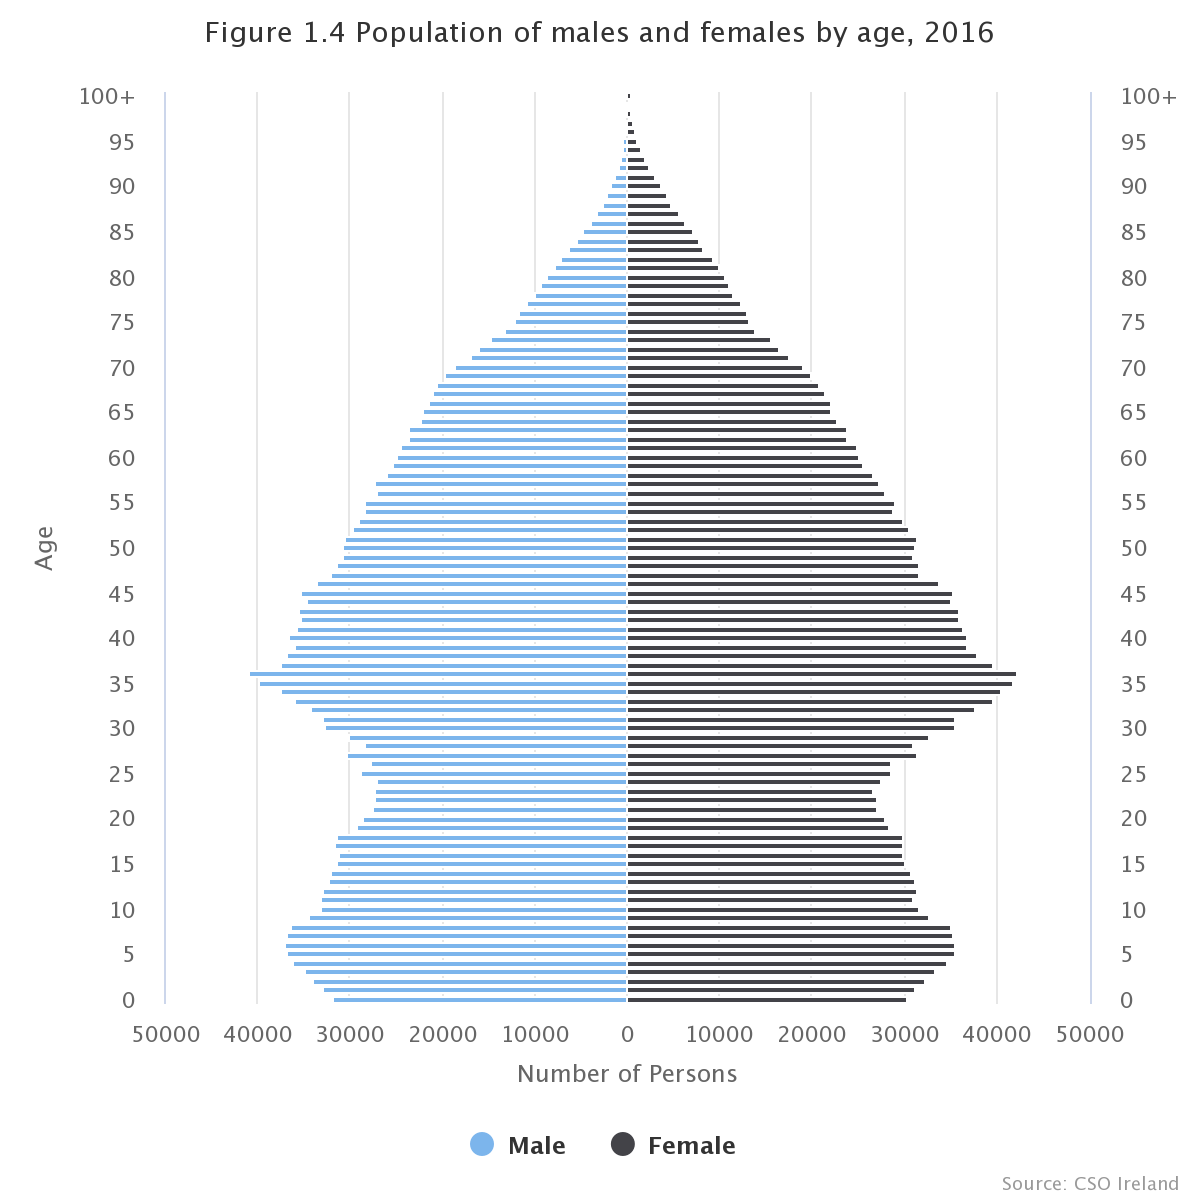

To accurately represent the age profile of the population in our simulated dataset I decided to use the <code>numpy.random.choice</code> function with a 1 dimensional array of probabilities for each of the ages between 18 and 99. Luckily, the Central Statistics Office provides us with the number of people for each given age in the population. The data is available at the following [link](http://www.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?maintable=EY007&PLanguage=0). To calculate the probability for each age we simply divide the count for each age by the total population between the ages of 18 and 99.

In [3]:
# Create array of ages between 18 and 99.
ages = np.arange(18, 100)

In [4]:
# Create 1d array of probabilities for each age.
prob = [0.017165, 0.016123, 0.015777, 0.015233, 0.015221, 0.015104,
        0.015294, 0.016040, 0.015754, 0.017265, 0.016650, 0.017584,
        0.019140, 0.019136, 0.020099, 0.021200, 0.021792, 0.022836,
        0.023298, 0.021615, 0.020914, 0.020391, 0.020559, 0.020156,
        0.019931, 0.019964, 0.019494, 0.019731, 0.018821, 0.017822,
        0.017627, 0.017323, 0.017359, 0.017306, 0.016854, 0.016496,
        0.015979, 0.016034, 0.015376, 0.015251, 0.014682, 0.014297,
        0.013964, 0.013791, 0.013246, 0.013274, 0.012614, 0.012365,
        0.012195, 0.011885, 0.011591, 0.011118, 0.010591, 0.009693,
        0.009082, 0.008463, 0.007614, 0.007127, 0.006920, 0.006537,
        0.006018, 0.005734, 0.005401, 0.004991, 0.004576, 0.004056,
        0.003670, 0.003346, 0.002893, 0.002460, 0.002066, 0.001798,
        0.001506, 0.001226, 0.000957, 0.000765, 0.000579, 0.000434,
        0.000339, 0.000207, 0.000126, 0.000089]

In [5]:
# Create numpy array of 5000 ages based on probabilities.
age = np.random.choice(ages, 5000, p=prob)

In [6]:
# Change seaborn theme and set figure size.
sns.set_style("darkgrid")
sns.set(rc = {'figure.figsize':(12,8)})

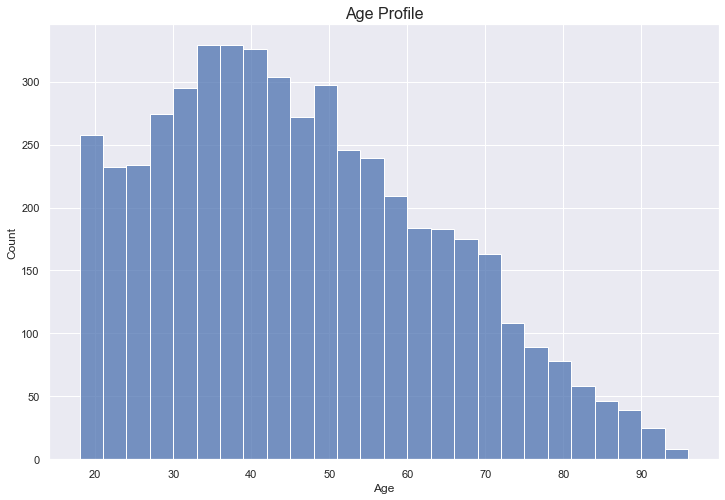

In [7]:
# Create Histplot for simulated age.
ax = sns.histplot(age)
# Add title and labels.
ax.set_title('Age Profile', fontsize=16)
ax.set_xlabel('Age')
plt.show()

In [8]:
# Assign Age values from numpy array for dataframe.
df['Age'] = age

In [9]:
# Reviewing the Average age and median age in our age array.
print(f'The Average age of our simulated data is {np.mean(age)}')
print(f'The Median age of our simulated data is {np.median(age)}')

The Average age of our simulated data is 45.8512
The Median age of our simulated data is 44.0


## Simulating Gender.

Gender is a categorical variable with only two options - Male or Female.

According to the Central Statistics Office, based on the 2016 census there were 97.8 males for every 100 females in Ireland [6]. To simulate the genders for our data set we can again use this fact and create probabilities for each of the genders. The probability for the male category = 0.4945 and the probability for the female category = 0.5055. Once again, we can use the <code>numpy.random.choice</code> function with these probabilities to create an array for gender which is representative of the population of Ireland.



In [10]:
# Create array with genders.
genders = ['Female', 'Male']
# Define probability for each gender.
prob = [0.5055, 0.4945]
# create numpy array for genders.
gender = np.random.choice(genders, 5000, p = prob)

In [11]:
gender

array(['Female', 'Female', 'Female', ..., 'Female', 'Female', 'Male'],
      dtype='<U6')

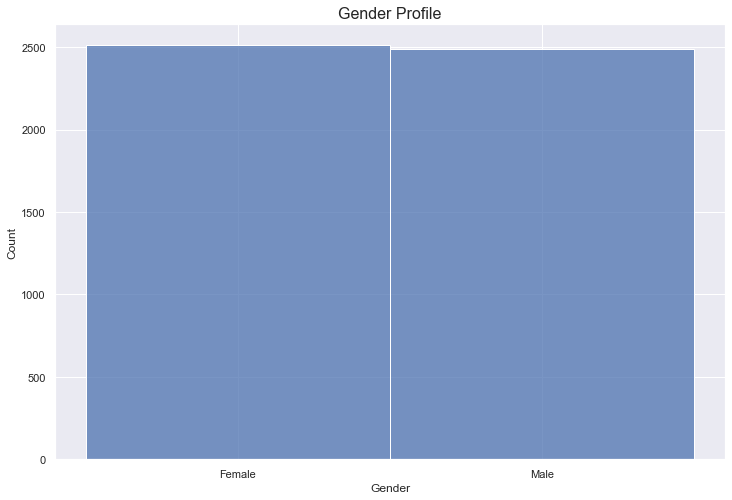

In [12]:
# Create Histplot for simulated gender.
ax = sns.histplot(gender)
# Add title and labels.
ax.set_title('Gender Profile', fontsize=16)
ax.set_xlabel('Gender')
plt.show()

In [13]:
# Count the number of males and females in our data set.
females = np.count_nonzero(gender == 'Female')
males = np.count_nonzero(gender == 'Male')

print(f'There are {females} females in our dataset and {males} Males.')
print(f'There are {(males/females)*100} males for every 100 females.')

There are 2513 females in our dataset and 2487 Males.
There are 98.96538002387585 males for every 100 females.


In [14]:
df['Gender'] = gender

In [15]:
df.head()

,Age,Gender,Smoker,High BP,Diabetes,Alcohol,Inactivity,BMI,Hi Cholesterol
0,25,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,46,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,38,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Simulating Smoker Data.

According to the Health Service Executive in 2020 the prevalence of somoking in Ireland was 15.4%. In the analysis performed in the [Smoking Prevalence Tracker 2020 Info-graph ](https://www.hse.ie/eng/about/who/tobaccocontrol/research/smoking-in-ireland-2020.pdf) we see that there is a difference in smoking rates between genders and across ages. 18.1% of males were calssified as smokers while 12.7% of females were smokers.

By age group, the highest prevalence of smoking was in the 25-34 year olds while the lowest prevalence was in the 65+ age category [7].


Angie Brown, Medical Director for the Irish Heart Foundation has stated that [8]:

> Smoking contributes to the long-term clogging or narrowing of the arteries and increases the risk of blood clots.
> These clots can suddenly block an artery completely causing a heart attack or stroke.

We can use the data for smoking prevalence by age category and gender to calculate probabilities for each group. Once the probabilities have been calculated we can once again use the <code>numpy.random.choice</code> function to assign a value for smoker based on these probabilities.

The Smoker variable in our data set will be a binary categorical variable with two possible values. If the person is a smoker the value will be Yes, if they are not a smoker the value will be No.





In [16]:
# Create array for smoker.
# 1 - does smoke, 0 = does not smoke.
smoke = ['Yes','No']

In [17]:
# Create a function to assign smoker value based on age and sex.

def smoker(row):
    if row['Age']<= 24 and row['Gender']=='Male':
        return np.random.choice(smoke, p = [0.208, 0.792])
    if row['Age']<= 24 and row['Gender']=='Female':
        return np.random.choice(smoke, p = [0.146, 0.854])
    if row['Age']<= 34 and row['Gender']=='Male':
        return np.random.choice(smoke, p = [0.247, 0.753])
    if row['Age']<= 34 and row['Gender']=='Female':
        return np.random.choice(smoke, p = [0.173, 0.827])
    if row['Age']<= 44 and row['Gender']=='Male':
        return np.random.choice(smoke, p = [0.221, 0.779])
    if row['Age']<= 44 and row['Gender']=='Female':
        return np.random.choice(smoke, p = [0.1551, 0.8449])
    if row['Age']<= 54 and row['Gender']=='Male':
        return np.random.choice(smoke, p = [0.1728, 0.8272])
    if row['Age']<= 54 and row['Gender']=='Female':
        return np.random.choice(smoke, p = [0.1213, 0.8787])
    if row['Age']<= 64 and row['Gender']=='Male':
        return np.random.choice(smoke, p = [0.1821, 0.8179])
    if row['Age']<= 64 and row['Gender']=='Female':
        return np.random.choice(smoke, p = [0.1279, 0.8721])
    if row['Age']> 64 and row['Gender']=='Male':
        return np.random.choice(smoke, p = [0.0893, 0.9107])
    if row['Age']> 64 and row['Gender']=='Female':
        return np.random.choice(smoke, p = [0.0627, 0.9373])
    return 'N/A'

In [18]:
# Use Pandas apply function in pandas to execute function
# Reference: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o [9]
df['Smoker'] = df.apply (lambda row: smoker(row), axis=1)

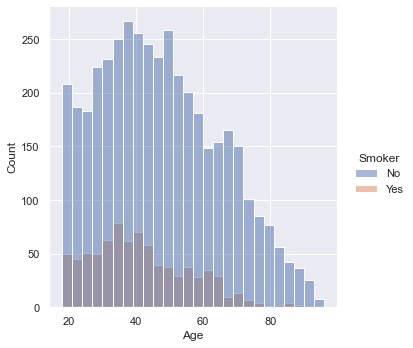

In [19]:
# Plot Distribution of smokers by age.
ax = sns.displot(x="Age", hue="Smoker", data=df)

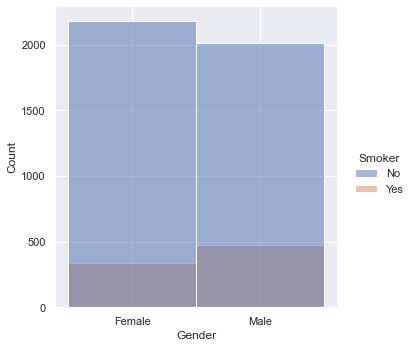

In [20]:
# Plot distribution of smokers by Gender.
ax = sns.displot(x="Gender", hue="Smoker", data=df)

In [21]:
# Create new dataframe grouped by Age.
age_df = df.groupby('Age')['Smoker'].value_counts(normalize=True)
# Calculate percentage values for smokers by age.
age_df = age_df.mul(100).rename('Percent').reset_index()

In [22]:
# Create bins for age ranges.
age_range = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
bins = [0, 24, 34, 44, 54, 64, 100]
# Use Pandas cut function to segment ages into age ranges [10]
age_df['Age_Range'] = pd.cut(age_df['Age'], bins=bins, labels=age_range)

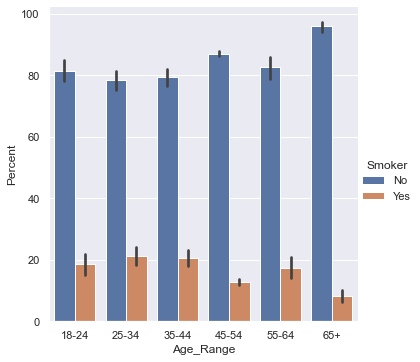

In [23]:
# Plot percentage smokers by age range.
ax = sns.catplot(x='Age_Range', y='Percent', hue='Smoker', kind='bar', data=age_df)

In [24]:
# Create new dataframe grouped by Gender.
gender_df = df.groupby('Gender')['Smoker'].value_counts(normalize=True)
# Calculate percentage values for smokers by gender.
gender_df = gender_df.mul(100).rename('Percent').reset_index()

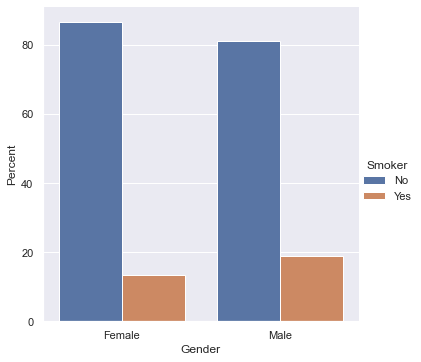

In [25]:
# Plot percentage smokers by age range.
ax = sns.catplot(x='Gender', y='Percent', hue='Smoker', kind='bar', data=gender_df)

# Simulating High Blood Pressure.

According to the Healthy Ireland Survey Report 2021, 6% of all men and 7% of all women who took part in the survey are currently living with high blood pressure. Their data analysis also shows a much higher prevalence of high blood pressure by age group[11].

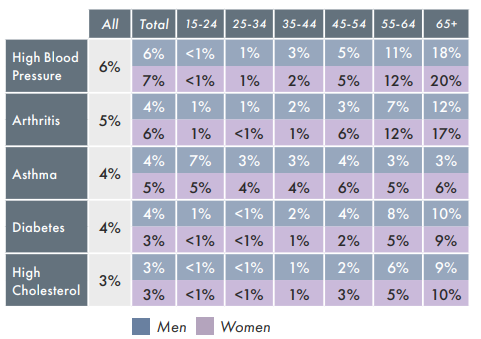


Blood pressure is measured by two numbers:

- The systolic pressure (higher of the two numbers) which measures the pressure as your heart is squeezing blood out.
- The diastolic pressure (lower of the two numbers) which measures the pressure when your heart relaxes to allow blood to flow back into it. [12]

According to the Centre for Disease Control [13]:

> High blood pressure can damage your arteries by making them less elastic, which decreases the flow of blood and oxygen to your heart and leads to heart disease. In addition, decreased blood flow to the
> heart can cause:

> 1. Chest pain, also called angina.
> 2. Heart attack, which happens when the blood supply to your heart is blocked and heart muscle begins to die without enough oxygen. The longer the blood flow is blocked, the greater the damage to the
>    heart.
> 3. Heart failure, a condition that means your heart can’t pump enough blood and oxygen to your other organs.

As with our "Smoker" variable High BP will be a binary categorical variable with two possible values. If the person has high blood pressure the value will be Yes, if not the value will be No.
We will use the <code>numpy.random.choice</code> with the statistics from the Healthy Ireland Survey Report to create our simulated data.

In [26]:
high_bp = ['Yes','No']

In [27]:
# Create a function to assign Blood Pressure value based on age and sex.

def bp(row):
    if row['Age']<= 24 and row['Gender']=='Male':
        return np.random.choice(high_bp, p = [0.005, 0.995])
    if row['Age']<= 24 and row['Gender']=='Female':
        return np.random.choice(high_bp, p = [0.005, 0.995])
    if row['Age']<= 34 and row['Gender']=='Male':
        return np.random.choice(high_bp, p = [0.01, 0.99])
    if row['Age']<= 34 and row['Gender']=='Female':
        return np.random.choice(high_bp, p = [0.01, 0.99])
    if row['Age']<= 44 and row['Gender']=='Male':
        return np.random.choice(high_bp, p = [0.03, 0.97])
    if row['Age']<= 44 and row['Gender']=='Female':
        return np.random.choice(high_bp, p = [0.04, 0.96])
    if row['Age']<= 54 and row['Gender']=='Male':
        return np.random.choice(high_bp, p = [0.05, 0.95])
    if row['Age']<= 54 and row['Gender']=='Female':
        return np.random.choice(high_bp, p = [0.05, 0.95])
    if row['Age']<= 64 and row['Gender']=='Male':
        return np.random.choice(high_bp, p = [0.11, 0.89])
    if row['Age']<= 64 and row['Gender']=='Female':
        return np.random.choice(high_bp, p = [0.12, 0.88])
    if row['Age']> 64 and row['Gender']=='Male':
        return np.random.choice(high_bp, p = [0.18, 0.82])
    if row['Age']> 64 and row['Gender']=='Female':
        return np.random.choice(high_bp, p = [0.20, 0.8])
    return 'N/A'

In [28]:
# Use Pandas apply function in pandas to execute function
# Reference: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o [9]
df['High BP'] = df.apply (lambda row: bp(row), axis=1)

In [29]:
df

,Age,Gender,Smoker,High BP,Diabetes,Alcohol,Inactivity,BMI,Hi Cholesterol
0,25,Female,No,No,NaN,NaN,NaN,NaN,NaN
1,25,Female,Yes,No,NaN,NaN,NaN,NaN,NaN
2,46,Female,No,No,NaN,NaN,NaN,NaN,NaN
3,41,Female,No,No,NaN,NaN,NaN,NaN,NaN
4,38,Female,No,No,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4995,45,Female,No,No,NaN,NaN,NaN,NaN,NaN
4996,48,Female,No,No,NaN,NaN,NaN,NaN,NaN
4997,56,Female,No,No,NaN,NaN,NaN,NaN,NaN
4998,41,Female,Yes,No,NaN,NaN,NaN,NaN,NaN


In [30]:
# Create new dataframe grouped by Age.
bp_age_df = df.groupby('Age')['High BP'].value_counts(normalize=True)
# Calculate percentage values for High Blood Pressure by age.
bp_age_df = bp_age_df.mul(100).rename('Percent').reset_index()

In [31]:
# Create bins for age ranges.
age_range = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
bins = [0, 24, 34, 44, 54, 64, 100]
# Use Pandas cut function to segment ages into age ranges [10]
bp_age_df['Age_Range'] = pd.cut(bp_age_df['Age'], bins=bins, labels=age_range)

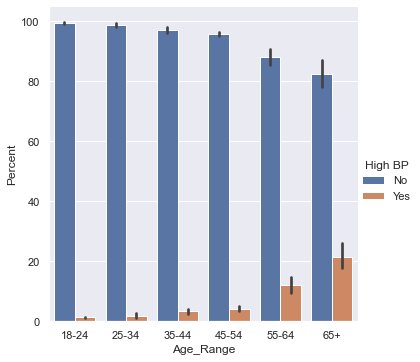

In [32]:
# Plot percentage High Blood Pressure by age range.
ax = sns.catplot(x='Age_Range', y='Percent', hue='High BP', kind='bar', data=bp_age_df)

In [33]:
# Create new dataframe grouped by Gender.
bp_gender_df = df.groupby('Gender')['High BP'].value_counts(normalize=True)
# Calculate percentage values for High Blood Pressure by gender.
bp_gender_df = bp_gender_df.mul(100).rename('Percent').reset_index()

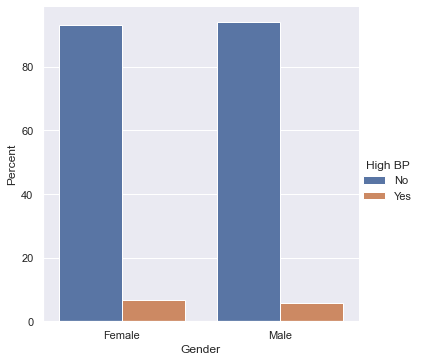

In [34]:
# Plot percentage High Blood Pressure by age range.
ax = sns.catplot(x='Gender', y='Percent', hue='High BP', kind='bar', data=bp_gender_df)

# Simulating Diabetes Data.

According to the Healthy Ireland Survey Report 2021, 4% of all men and 3% of all women in who responded to the survey reported that they had diabetes. Once again we see that the risk of diabetes is dependent on age as well as gender[14].

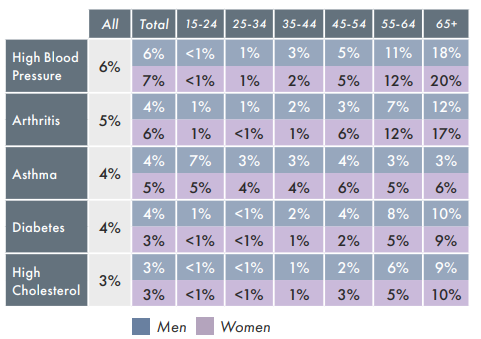


The International Diabetes Federation staes that diabetes is:

> a chronic disease that occurs when the pancreas is no longer able to make insulin, or when the body cannot make good use of the insulin it produces.

> Not being able to produce insulin or use it effectively leads to raised glucose levels in the blood (known as hyperglycaemia). Over the long-term high glucose levels are associated with damage to the
> body and failure of various organs and tissues.[15]

There are three types of diabetes:

- Type 1 diabetes: Mostly occurs in children and adolescents.
- Type 2 diabetes: Mostly occurs in adults and accounts for more than 90% of cases.
- Gestational diabetes: Occurs during pregnancy but usually diappears after preganancy.

According to John Hopkins Medicine, people with diabetes are two to four times more likely to develop heart disease. [16]

As with our Smoker and High BP simulate data, the Diabetes variable will be categorical with two potential values - Yes or No. 
We will use the <code>numpy.random.choice</code> with the statistics from the Healthy Ireland Survey Report to create our simulated data.

In [35]:
diab = ['Yes','No']

In [36]:
# Create a function to assign Diabetes value based on age and sex.
def diabetes(row):
    if row['Age']<= 24 and row['Gender']=='Male':
        return np.random.choice(diab, p = [0.01, 0.99])
    if row['Age']<= 24 and row['Gender']=='Female':
        return np.random.choice(diab, p = [0.005, 0.995])
    if row['Age']<= 34 and row['Gender']=='Male':
        return np.random.choice(diab, p = [0.005, 0.995])
    if row['Age']<= 34 and row['Gender']=='Female':
        return np.random.choice(diab, p = [0.005, 0.995])
    if row['Age']<= 44 and row['Gender']=='Male':
        return np.random.choice(diab, p = [0.02, 0.98])
    if row['Age']<= 44 and row['Gender']=='Female':
        return np.random.choice(diab, p = [0.01, 0.99])
    if row['Age']<= 54 and row['Gender']=='Male':
        return np.random.choice(diab, p = [0.04, 0.96])
    if row['Age']<= 54 and row['Gender']=='Female':
        return np.random.choice(diab, p = [0.02, 0.98])
    if row['Age']<= 64 and row['Gender']=='Male':
        return np.random.choice(diab, p = [0.08, 0.92])
    if row['Age']<= 64 and row['Gender']=='Female':
        return np.random.choice(diab, p = [0.05, 0.95])
    if row['Age']> 64 and row['Gender']=='Male':
        return np.random.choice(diab, p = [0.10, 0.90])
    if row['Age']> 64 and row['Gender']=='Female':
        return np.random.choice(diab, p = [0.09, 0.91])
    return 'N/A'

In [37]:
# Use Pandas apply function in pandas to execute function
# Reference: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o [9]
df['Diabetes'] = df.apply (lambda row: diabetes(row), axis=1)

In [38]:
df

,Age,Gender,Smoker,High BP,Diabetes,Alcohol,Inactivity,BMI,Hi Cholesterol
0,25,Female,No,No,No,NaN,NaN,NaN,NaN
1,25,Female,Yes,No,No,NaN,NaN,NaN,NaN
2,46,Female,No,No,No,NaN,NaN,NaN,NaN
3,41,Female,No,No,No,NaN,NaN,NaN,NaN
4,38,Female,No,No,No,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4995,45,Female,No,No,No,NaN,NaN,NaN,NaN
4996,48,Female,No,No,No,NaN,NaN,NaN,NaN
4997,56,Female,No,No,No,NaN,NaN,NaN,NaN
4998,41,Female,Yes,No,No,NaN,NaN,NaN,NaN


In [39]:
# Create new dataframe grouped by Age.
diab_age_df = df.groupby('Age')['Diabetes'].value_counts(normalize=True)
# Calculate percentage values for diabetes by age.
diab_age_df = diab_age_df.mul(100).rename('Percent').reset_index()

In [40]:
# Create bins for age ranges.
age_range = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
bins = [0, 24, 34, 44, 54, 64, 100]
# Use Pandas cut function to segment ages into age ranges [10]
diab_age_df['Age_Range'] = pd.cut(diab_age_df['Age'], bins=bins, labels=age_range)

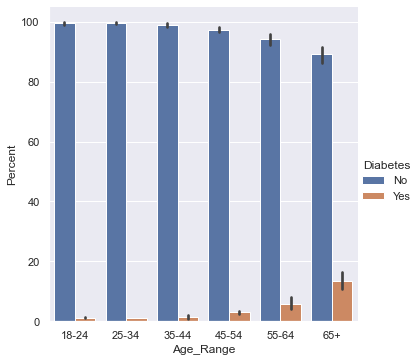

In [41]:
# Plot percentage diabetes by age range.
ax = sns.catplot(x='Age_Range', y='Percent', hue='Diabetes', kind='bar', data=diab_age_df)

In [42]:
# Create new dataframe grouped by Gender.
diab_gender_df = df.groupby('Gender')['Diabetes'].value_counts(normalize=True)
# Calculate percentage values for diabetes by gender.
diab_gender_df = diab_gender_df.mul(100).rename('Percent').reset_index()

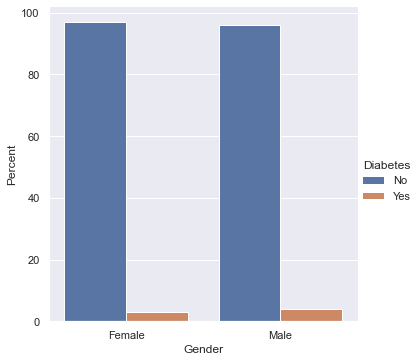

In [43]:
# Plot percentage diabetes by age range.
ax = sns.catplot(x='Gender', y='Percent', hue='Diabetes', kind='bar', data=diab_gender_df)

# Simulating Alcohol Consumption.

66% of people who repsonded to the Healthy Ireland survey reported that they had drunk alcohol in the six months prior to the survey. There is a gender dependency with men drinking more (68%) than women (63%) and there is differences across the age ranges with those in the 75+ category drinking much less. [17]

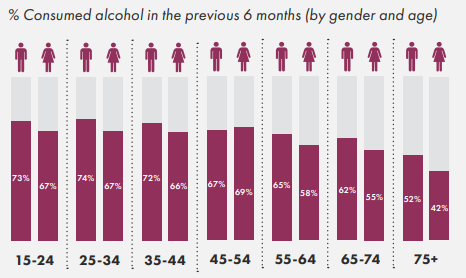

The link between alcohol consumption and heart disease is not as clear cut as our previous variables. John Hopkins cardiologist, John McEvoy noted that there was some evidence that moderate amounts of alcohol might help to slightly raise levels of “good” HDL cholesterol thereby reducing the risk of cardiovasular disease. [18] What there does seem to be concensus on is that there is evidence of a causal relationship between higher alcohol consumption and increased risk of stroke and peripheral artery disease. [19]


For the purpose of our simulated data I have decided that we will use the available data for "Binge drinking" of alcohol rather than low or moderate levels.

According to the HSE:

> Binge drinking is defined as drinking six or more standard drinks in one sitting. Common examples of one standard drink are a half pint of lager/stout/cider, a 100ml glass of wine (at 12.5% ABV)
> or pub measure (35.5ml) of spirits. On average, it takes one hour for the body to process one standard drink. [20]

The Healthy Ireland Survey also provides data on the percentage of respondents in various age groups who binge drink:


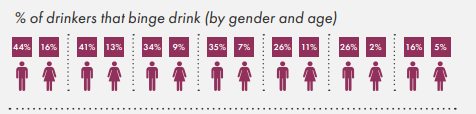

We will use this data sert to simulate our Alcohol Consumption categorical variable. Once again, Yes will indicate that the person does binge drink, No will indicate that they do not.

It is worth pointing out that the age ranges are slightly different for this data set compared to the preceding ones.

In [44]:
df.head()

,Age,Gender,Smoker,High BP,Diabetes,Alcohol,Inactivity,BMI,Hi Cholesterol
0,25,Female,No,No,No,NaN,NaN,NaN,NaN
1,25,Female,Yes,No,No,NaN,NaN,NaN,NaN
2,46,Female,No,No,No,NaN,NaN,NaN,NaN
3,41,Female,No,No,No,NaN,NaN,NaN,NaN
4,38,Female,No,No,No,NaN,NaN,NaN,NaN


In [45]:
binge = ['Yes', 'No']

In [46]:
# Create a function to assign Alcohol value based on age and sex.
def alcohol(row):
    if row['Age']<= 24 and row['Gender']=='Male':
        return np.random.choice(binge, p = [0.44, 0.56])
    if row['Age']<= 24 and row['Gender']=='Female':
        return np.random.choice(binge, p = [0.16, 0.84])
    if row['Age']<= 34 and row['Gender']=='Male':
        return np.random.choice(binge, p = [0.41, 0.59])
    if row['Age']<= 34 and row['Gender']=='Female':
        return np.random.choice(binge, p = [0.13, 0.87])
    if row['Age']<= 44 and row['Gender']=='Male':
        return np.random.choice(binge, p = [0.34, 0.66])
    if row['Age']<= 44 and row['Gender']=='Female':
        return np.random.choice(binge, p = [0.09, 0.91])
    if row['Age']<= 54 and row['Gender']=='Male':
        return np.random.choice(binge, p = [0.35, 0.65])
    if row['Age']<= 54 and row['Gender']=='Female':
        return np.random.choice(binge, p = [0.07, 0.93])
    if row['Age']<= 64 and row['Gender']=='Male':
        return np.random.choice(binge, p = [0.26, 0.74])
    if row['Age']<= 64 and row['Gender']=='Female':
        return np.random.choice(binge, p = [0.11, 0.89])
    if row['Age']<= 74 and row['Gender']=='Male':
        return np.random.choice(binge, p = [0.26, 0.74])
    if row['Age']<= 74 and row['Gender']=='Female':
        return np.random.choice(binge, p = [0.02, 0.98])
    if row['Age']> 74 and row['Gender']=='Male':
        return np.random.choice(binge, p = [0.16, 0.84])
    if row['Age']> 74 and row['Gender']=='Female':
        return np.random.choice(binge, p = [0.05, 0.95])
    return 'N/A'

In [47]:
# Use Pandas apply function in pandas to execute function
# Reference: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o [9]
df['Alcohol'] = df.apply (lambda row: alcohol(row), axis=1)

In [48]:
df

,Age,Gender,Smoker,High BP,Diabetes,Alcohol,Inactivity,BMI,Hi Cholesterol
0,25,Female,No,No,No,No,NaN,NaN,NaN
1,25,Female,Yes,No,No,No,NaN,NaN,NaN
2,46,Female,No,No,No,No,NaN,NaN,NaN
3,41,Female,No,No,No,No,NaN,NaN,NaN
4,38,Female,No,No,No,No,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4995,45,Female,No,No,No,No,NaN,NaN,NaN
4996,48,Female,No,No,No,No,NaN,NaN,NaN
4997,56,Female,No,No,No,Yes,NaN,NaN,NaN
4998,41,Female,Yes,No,No,No,NaN,NaN,NaN


In [49]:
# Create new dataframe grouped by Age.
alc_age_df = df.groupby('Age')['Alcohol'].value_counts(normalize=True)
# Calculate percentage values for alcohol drinker by age.
alc_age_df = alc_age_df.mul(100).rename('Percent').reset_index()

In [50]:
# Create bins for age ranges.
age_range = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']
bins = [0, 24, 34, 44, 54, 64, 74, 100]
# Use Pandas cut function to segment ages into age ranges [10]
alc_age_df['Age_Range'] = pd.cut(alc_age_df['Age'], bins=bins, labels=age_range)

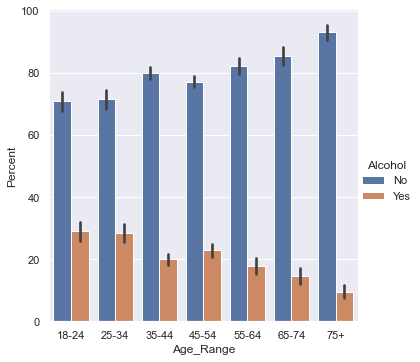

In [51]:
# Plot percentage alcohol drinkers by age range.
ax = sns.catplot(x='Age_Range', y='Percent', hue='Alcohol', kind='bar', data=alc_age_df)

In [52]:
# Create new dataframe grouped by Gender.
alc_gender_df = df.groupby('Gender')['Alcohol'].value_counts(normalize=True)
# Calculate percentage values for alcohol drinker by gender.
alc_gender_df = alc_gender_df.mul(100).rename('Percent').reset_index()

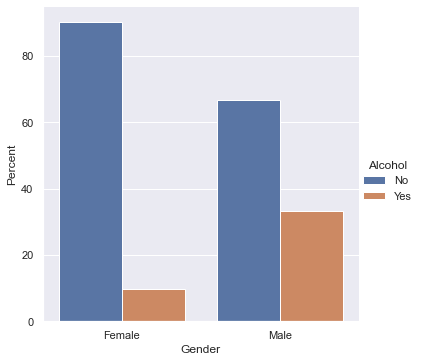

In [53]:
# Plot percentage alchohol drinkers by age range.
ax = sns.catplot(x='Gender', y='Percent', hue='Alcohol', kind='bar', data=alc_gender_df)

In [54]:
df.head()

,Age,Gender,Smoker,High BP,Diabetes,Alcohol,Inactivity,BMI,Hi Cholesterol
0,25,Female,No,No,No,No,NaN,NaN,NaN
1,25,Female,Yes,No,No,No,NaN,NaN,NaN
2,46,Female,No,No,No,No,NaN,NaN,NaN
3,41,Female,No,No,No,No,NaN,NaN,NaN
4,38,Female,No,No,No,No,NaN,NaN,NaN


## Physical Activity.

The most recent data we have by age range for the percentage of adults achieivng the recommended physical activity guidelines was published in 2019. The Irish Physical Activity Research Collaboration (I-PARC) published the following infographic:

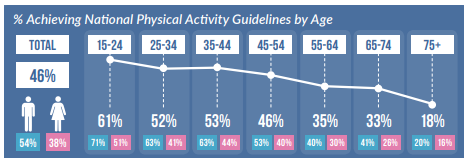

Once again, we see a gender and age dependency for physical activity with younger cohorts being more active than older cohorts and males being more active than females [21].

In a meta-analyis of prosepctive cohort studies [22] it was found that higher levels of active leisure time invo,ving physical activity reduced the risk of cardiovascular diseases by between 20% and 30%. A further article in the Medicine & Science in Sports & Exercise Journal revealed that:

> In men, the lifetime risks of coronary heart disease were 36.2% for poor physical activity and 31.6% for recommended physical activity, those of heart failure were 29.8% for poor physical activity and
> 21.9% for recommended activity, and those of stroke were 11.9% for poor physical activity and 10.5% for recommended activity; in women, the lifetime risks of coronary heart disease were 20.8% for poor 
> physical activity and 12.8% for recommended physical activity, those of heart failure were 27.3% for poor physical activity and 19.2% for recommended activity, and those of stroke were 11.5 % for poor 
> physical activity and 8.6% for recommended activity.[23]

According to John Hopkins Medicine, exercise can benefit your heart health as it:

- Improves the muscles’ ability to pull oxygen out of the blood, reducing the need for the heart to pump more blood to the muscles
- Reduces stress hormones that can put an extra burden on the heart
- Works like a beta blocker to slow the heart rate and lower blood pressure
- Increases high-density lipoprotein (HDL) or “good” cholesterol and helps control triglycerides [24]

As we have the data showing the percentage of males / females who meet the government recommendations for exercise by age range, we will once again use these figures with the <code>numpy.normal.choice</code> function and pass the relevant probabilities for each gendder / age group to simulate our categorical variable.

In [55]:
inactive = ['Yes', 'No']

In [56]:
# Create a function to assign inactivity value based on age and sex.
def exercise(row):
    if row['Age']<= 24 and row['Gender']=='Male':
        return np.random.choice(inactive, p = [0.29, 0.71])
    if row['Age']<= 24 and row['Gender']=='Female':
        return np.random.choice(inactive, p = [0.49, 0.51])
    if row['Age']<= 34 and row['Gender']=='Male':
        return np.random.choice(inactive, p = [0.37, 0.63])
    if row['Age']<= 34 and row['Gender']=='Female':
        return np.random.choice(inactive, p = [0.59, 0.41])
    if row['Age']<= 44 and row['Gender']=='Male':
        return np.random.choice(inactive, p = [0.37, 0.63])
    if row['Age']<= 44 and row['Gender']=='Female':
        return np.random.choice(inactive, p = [0.56, 0.44])
    if row['Age']<= 54 and row['Gender']=='Male':
        return np.random.choice(inactive, p = [0.47, 0.53])
    if row['Age']<= 54 and row['Gender']=='Female':
        return np.random.choice(inactive, p = [0.60, 0.40])
    if row['Age']<= 64 and row['Gender']=='Male':
        return np.random.choice(inactive, p = [0.60, 0.40])
    if row['Age']<= 64 and row['Gender']=='Female':
        return np.random.choice(inactive, p = [0.70, 0.30])
    if row['Age']<= 74 and row['Gender']=='Male':
        return np.random.choice(inactive, p = [0.59, 0.41])
    if row['Age']<= 74 and row['Gender']=='Female':
        return np.random.choice(inactive, p = [0.74, 0.26])
    if row['Age']> 74 and row['Gender']=='Male':
        return np.random.choice(inactive, p = [0.80, 0.20])
    if row['Age']> 74 and row['Gender']=='Female':
        return np.random.choice(inactive, p = [0.84, 0.16])
    return 'N/A'

In [57]:
# Use Pandas apply function in pandas to execute function
# Reference: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o [9]
df['Inactivity'] = df.apply (lambda row: exercise(row), axis=1)

In [58]:
# Create new dataframe grouped by Age.
act_age_df = df.groupby('Age')['Inactivity'].value_counts(normalize=True)
# Calculate percentage values for inactivity by age.
act_age_df = act_age_df.mul(100).rename('Percent').reset_index()

In [59]:
# Create bins for age ranges.
age_range = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']
bins = [0, 24, 34, 44, 54, 64, 74, 100]
# Use Pandas cut function to segment ages into age ranges [10]
act_age_df['Age_Range'] = pd.cut(act_age_df['Age'], bins=bins, labels=age_range)

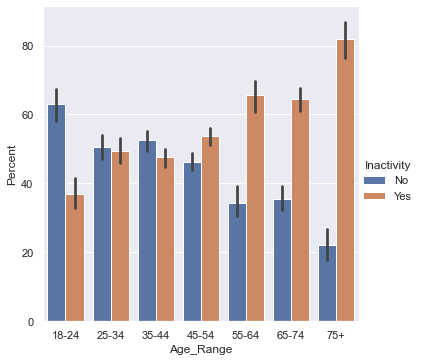

In [60]:
# Plot percentage inactivity by age range.
ax = sns.catplot(x='Age_Range', y='Percent', hue='Inactivity', kind='bar', data=act_age_df)

In [61]:
# Create new dataframe grouped by Gender.
act_gender_df = df.groupby('Gender')['Inactivity'].value_counts(normalize=True)
# Calculate percentage values for inactivity by gender.
act_gender_df = act_gender_df.mul(100).rename('Percent').reset_index()

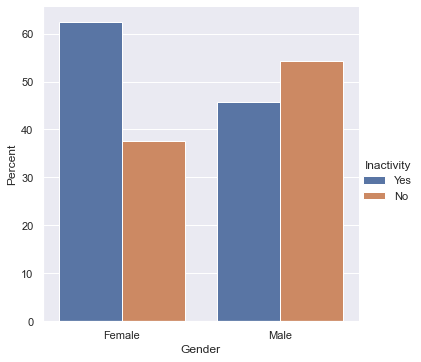

In [62]:
# Plot percentage inactivity by age range.
ax = sns.catplot(x='Gender', y='Percent', hue='Inactivity', kind='bar', data=act_gender_df)

In [63]:
df.head()

,Age,Gender,Smoker,High BP,Diabetes,Alcohol,Inactivity,BMI,Hi Cholesterol
0,25,Female,No,No,No,No,No,NaN,NaN
1,25,Female,Yes,No,No,No,No,NaN,NaN
2,46,Female,No,No,No,No,No,NaN,NaN
3,41,Female,No,No,No,No,Yes,NaN,NaN
4,38,Female,No,No,No,No,Yes,NaN,NaN


## Body Mass Index (BMI).

Body mass index (BMI) is a standardized measure used to estimate whether or not someone is underweight, normal weight, overweight or obese. It is calculated by dividing weight (in kilograms) by height (in meters) squared. 

A BMI score below 18.5 is considered underweight, a score between 18.5 and 24.9 is considered normal. A score of over 25 is overweight, with scores of 30 or higher considered obese.

According to a survey on weight carried out by Eurostat (EU's statistics Agency) Ireland has the second highest rate of Obesity in the European Union. [25]

In the Healthy Ireland Summary Report 2019, we are provided with the BMI breakdown by age and gender: [26]

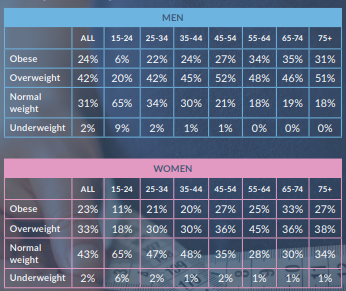

We can see that men are more likely to overweight or obese than women and the proportion of the population classified as overweight or obese increases with age.

It is well established that Obesity is associated with an increased risk for developing heart disease. Even in patients without other risk factors (such as diabetes or inactivity) obesity is a strong independent predictor of cardivascular disease [27]. The mechanism for the increase in risk due to obesity is because an individual who is obese may experince an increase on the load of the atherosclerotic plaques resulting in plaque instability.

Despite the scientific literature, there have been concersn raised about the accuracy of the BMI measurement. Researchers from the Perelman School of Medicine, University of Pennsylvania have stated that the BMI measurement as we currently know it "is an inaccurate measure of body fat content and does not take into account muscle mass, bone density, overall body composition, and racial and sex differences". [28]

However, until we have a recognized, standardised measurement for obesity we will use BMI in our simulated data set as there has been a proven link between obesity and cardiovasulcar disease.

We will create a simulated categorical variable - "BMI" with four possible values based on the Healthy Ireland SUmmary Report 2019 BMI data:

1. Underweight
2. Normal
3. Overweight
4. Obese.


In [64]:
weight = ['Underweight', 'Normal', 'Overweight', 'Obese']

In [65]:
def bmi(row):
    if row['Age']<= 24 and row['Gender']=='Male':
        return np.random.choice(weight, p = [0.09, 0.65, 0.2, 0.06])
    if row['Age']<= 24 and row['Gender']=='Female':
        return np.random.choice(weight, p = [0.06, 0.65, 0.18, 0.11])
    if row['Age']<= 34 and row['Gender']=='Male':
        return np.random.choice(weight, p = [0.02, 0.34, 0.42, 0.22])
    if row['Age']<= 34 and row['Gender']=='Female':
        return np.random.choice(weight, p = [0.02, 0.47, 0.30, 0.21])
    if row['Age']<= 44 and row['Gender']=='Male':
        return np.random.choice(weight, p = [0.01, 0.30, 0.45, 0.24])
    if row['Age']<= 44 and row['Gender']=='Female':
        return np.random.choice(weight, p = [0.01, 0.48, 0.30, 0.21])
    if row['Age']<= 54 and row['Gender']=='Male':
        return np.random.choice(weight, p = [0.01, 0.21, 0.515, 0.265])
    if row['Age']<= 54 and row['Gender']=='Female':
        return np.random.choice(weight, p = [0.02, 0.35, 0.36, 0.27])
    if row['Age']<= 64 and row['Gender']=='Male':
        return np.random.choice(weight, p = [0.00, 0.18, 0.48, 0.34])
    if row['Age']<= 64 and row['Gender']=='Female':
        return np.random.choice(weight, p = [0.01, 0.285, 0.45, 0.255])
    if row['Age']<= 74 and row['Gender']=='Male':
        return np.random.choice(weight, p = [0.00, 0.19, 0.46, 0.35])
    if row['Age']<= 74 and row['Gender']=='Female':
        return np.random.choice(weight, p = [0.01, 0.30, 0.36, 0.33])
    if row['Age']> 74 and row['Gender']=='Male':
        return np.random.choice(weight, p = [0.00, 0.18, 0.51, 0.31])
    if row['Age']> 74 and row['Gender']=='Female':
        return np.random.choice(weight, p = [0.01, 0.34, 0.38, 0.27])
    return 'N/A'

In [66]:
# Use Pandas apply function in pandas to execute function
# Reference: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o [9]
df['BMI'] = df.apply (lambda row: bmi(row), axis=1)

In [67]:
df.head()

,Age,Gender,Smoker,High BP,Diabetes,Alcohol,Inactivity,BMI,Hi Cholesterol
0,25,Female,No,No,No,No,No,Normal,NaN
1,25,Female,Yes,No,No,No,No,Overweight,NaN
2,46,Female,No,No,No,No,No,Normal,NaN
3,41,Female,No,No,No,No,Yes,Normal,NaN
4,38,Female,No,No,No,No,Yes,Obese,NaN


In [68]:
# Create new dataframe grouped by Age.
bmi_age_df = df.groupby('Age')['BMI'].value_counts(normalize=True)
# Calculate percentage values for BMI by age.
bmi_age_df = bmi_age_df.mul(100).rename('Percent').reset_index()

In [69]:
# Create bins for age ranges.
age_range = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']
bins = [0, 24, 34, 44, 54, 64, 74, 100]
# Use Pandas cut function to segment ages into age ranges [10]
bmi_age_df['Age_Range'] = pd.cut(bmi_age_df['Age'], bins=bins, labels=age_range)

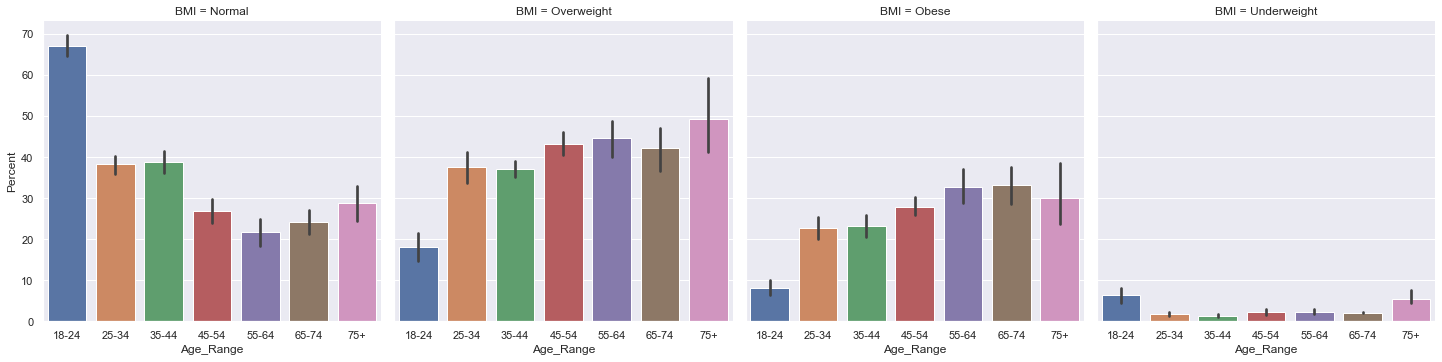

In [70]:
# Plot percentage BMI by age range.
ax = sns.catplot(x='Age_Range', y='Percent', col='BMI', kind='bar', data=bmi_age_df)

In [71]:
# Create new dataframe grouped by Gender.
bmi_gender_df = df.groupby('Gender')['BMI'].value_counts(normalize=True)
# Calculate percentage values for BMI by gender.
bmi_gender_df = bmi_gender_df.mul(100).rename('Percent').reset_index()

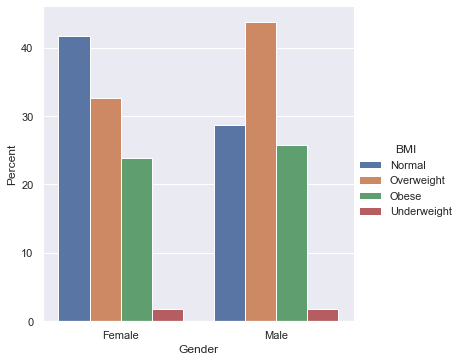

In [72]:
# Plot percentage BMI by age range.
ax = sns.catplot(x='Gender', y='Percent', hue='BMI', kind='bar', data=bmi_gender_df)

## Simulating High Cholesterol


Cholesterol is a waxy / fatty substance found in your blood which is produced in the liver and consumed via food. Cholesterol is vital to your body as it forsm part of the membrane of every cell in the body, it is used in the body to make vitamin D and steroidal hormones and it is used to make bile which aid in fat digestion. [29]

It is worth noting that there are two types of cholesterol in our bodies - LDL (Low Desity Lipoproteins) and HDL (High Density Lipoproteins). It is a higher level of LDL cholesterol that is associated with an increased risk of heart disease. As cholesterol is circulated around our bodies via the bloodstream it cann accumulate on the blood vessel walls and contribute to plaque formations. These plaque formations (also known as atherosclerosis) can cause the vessel to narrow and restrict blood flow to the heart [30[

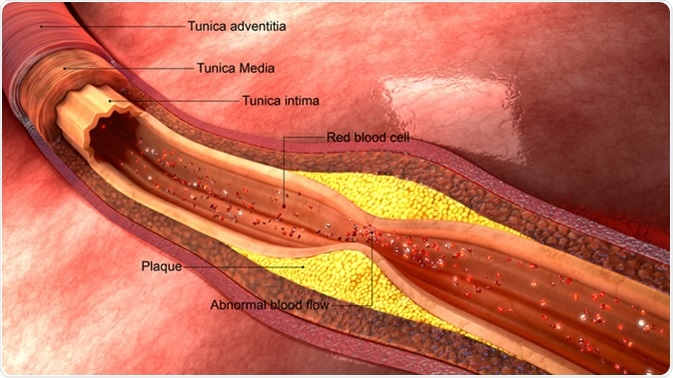

Reviewing the data in the Health Ireland Survey 2021 we see that high Cholesterol levels are equal across genders but there is an age dependency with older adults more likely to have higher values[31]

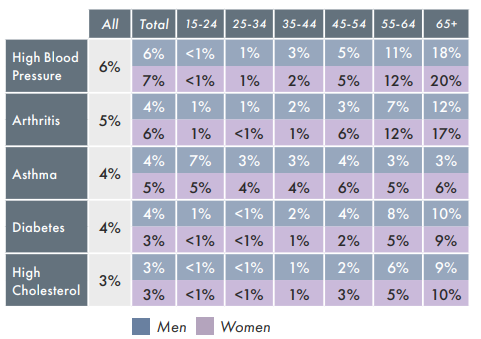



In [73]:
hi_chol = ['Yes', 'No']

In [74]:
def chol(row):
    if row['Age']<= 24 and row['Gender']=='Male':
        return np.random.choice(hi_chol, p = [0.004, 0.996])
    if row['Age']<= 24 and row['Gender']=='Female':
        return np.random.choice(hi_chol, p = [0.004, 0.996])
    if row['Age']<= 34 and row['Gender']=='Male':
        return np.random.choice(hi_chol, p = [0.004, 0.996])
    if row['Age']<= 34 and row['Gender']=='Female':
        return np.random.choice(hi_chol, p = [0.004, 0.996])
    if row['Age']<= 44 and row['Gender']=='Male':
        return np.random.choice(hi_chol, p = [0.01, 0.99])
    if row['Age']<= 44 and row['Gender']=='Female':
        return np.random.choice(hi_chol, p = [0.01, 0.99])
    if row['Age']<= 54 and row['Gender']=='Male':
        return np.random.choice(hi_chol, p = [0.02, 0.98])
    if row['Age']<= 54 and row['Gender']=='Female':
        return np.random.choice(hi_chol, p = [0.03, 0.97])
    if row['Age']<= 64 and row['Gender']=='Male':
        return np.random.choice(hi_chol, p = [0.06, 0.94])
    if row['Age']<= 64 and row['Gender']=='Female':
        return np.random.choice(hi_chol, p = [0.05, 0.95])
    if row['Age']> 64 and row['Gender']=='Male':
        return np.random.choice(hi_chol, p = [0.09, 0.91])
    if row['Age']> 64 and row['Gender']=='Female':
        return np.random.choice(hi_chol, p = [0.10, 0.90])
    return 'N/A'

In [75]:
# Use Pandas apply function in pandas to execute function
# Reference: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o [9]
df['Hi Cholesterol'] = df.apply (lambda row: chol(row), axis=1)

In [76]:
df.head()

,Age,Gender,Smoker,High BP,Diabetes,Alcohol,Inactivity,BMI,Hi Cholesterol
0,25,Female,No,No,No,No,No,Normal,No
1,25,Female,Yes,No,No,No,No,Overweight,No
2,46,Female,No,No,No,No,No,Normal,No
3,41,Female,No,No,No,No,Yes,Normal,No
4,38,Female,No,No,No,No,Yes,Obese,No


In [77]:
# Create new dataframe grouped by Age.
cho_age_df = df.groupby('Age')['Hi Cholesterol'].value_counts(normalize=True)
# Calculate percentage values for High Cholesterol by age.
cho_age_df = cho_age_df.mul(100).rename('Percent').reset_index()

In [78]:
# Create bins for age ranges.
age_range = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']
bins = [0, 24, 34, 44, 54, 64, 74, 100]
# Use Pandas cut function to segment ages into age ranges [10]
cho_age_df['Age_Range'] = pd.cut(cho_age_df['Age'], bins=bins, labels=age_range)

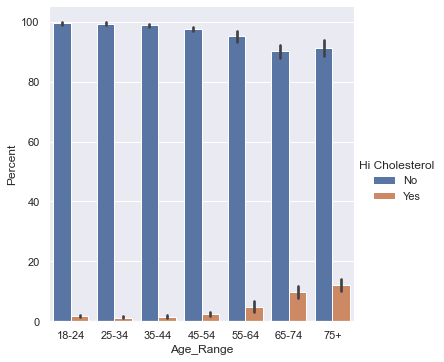

In [79]:
# Plot percentage High Cholesterol by age range.
ax = sns.catplot(x='Age_Range', y='Percent', hue='Hi Cholesterol', kind='bar', data=cho_age_df)

In [80]:
# Create new dataframe grouped by Gender.
cho_gender_df = df.groupby('Gender')['Hi Cholesterol'].value_counts(normalize=True)
# Calculate percentage values for High Cholesterol by gender.
cho_gender_df = cho_gender_df.mul(100).rename('Percent').reset_index()

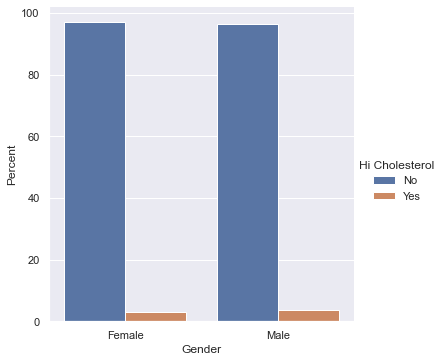

In [81]:
# Plot percentage High Cholesterol by age range.
ax = sns.catplot(x='Gender', y='Percent', hue='Hi Cholesterol', kind='bar', data=cho_gender_df)

https://www.bmj.com/content/357/bmj.j2099

https://www.aafp.org/afp/2010/0801/p265.html

In [82]:
# Add age range into main dataframe

# Create bins for age ranges.
age_range = ['18-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-100']
bins = [0, 34, 39, 44, 49, 54, 59, 64, 69, 100]
# Use Pandas cut function to segment ages into age ranges [10]
df['Age_Range'] = pd.cut(df['Age'], bins=bins, labels=age_range)

## Determining Risk Factor Weighting for Each Categorical Variable.

In this last section I wanted to calculate a relative risk score for each of the variables we have simulated in our data set.
In their paper "Global Risk of Coronary Heart Disease: Assessment and Application", Viera and Sheridan attribute various scoring indexes for certain risk factors associated with Cardiovascular disease. The risk factors listed are:

- Age
- Gender
- Cholesterol Level
- Diabetes
- Smoking
- Blood Pressure

This covers 6 of the 9 variables that we have created in our simulated dataset. While there are no quantatative numbers associated with Inactivity, BMI or Alcohol, we can interrogate other literature to assess what we values we should assign for these variables.

In [111]:
df.columns

Index(['Age', 'Gender', 'Smoker', 'High BP', 'Diabetes', 'Alcohol',
       'Inactivity', 'BMI', 'Hi Cholesterol', 'Age_Range', 'Age_Risk',
       'Cholesterol_Risk', 'BP_Risk', 'Diabetes_Risk', 'Alcohol_Risk',
       'BMI_Risk', 'Inactivity_Risk'],
      dtype='object')

### Risk Factor Tables

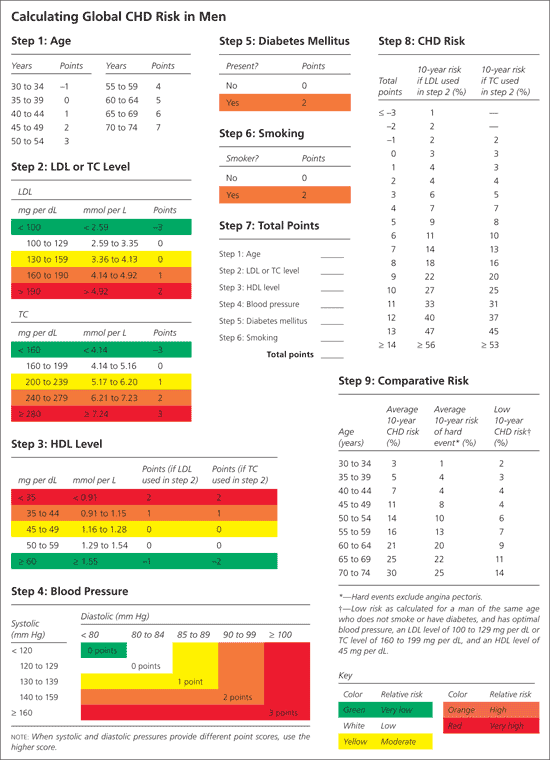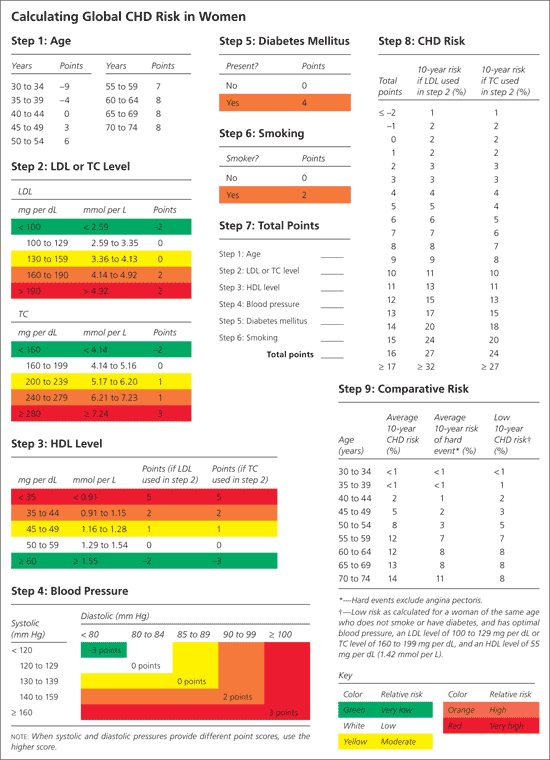




In [86]:
# Assigning Age Risk based on Gender / Age.
# Reference: https://www.aafp.org/afp/2010/0801/p265.html

def age_risk(row):
    if row['Age_Range']== '18-34' and row['Gender']=='Male':
        return -1
    if row['Age_Range']== '18-34' and row['Gender']=='Female':
        return -9
    if row['Age_Range']== '35-39' and row['Gender']=='Male':
        return 0
    if row['Age_Range']== '35-39' and row['Gender']=='Female':
        return -4
    if row['Age_Range']== '40-44' and row['Gender']=='Male':
        return 1
    if row['Age_Range']== '40-44' and row['Gender']=='Female':
        return 0
    if row['Age_Range']== '45-49' and row['Gender']=='Male':
        return 2
    if row['Age_Range']== '45-49' and row['Gender']=='Female':
        return 3
    if row['Age_Range']== '50-54' and row['Gender']=='Male':
        return 3
    if row['Age_Range']== '50-54' and row['Gender']=='Female':
        return 6
    if row['Age_Range']== '55-59' and row['Gender']=='Male':
        return 4
    if row['Age_Range']== '55-59' and row['Gender']=='Female':
        return 7
    if row['Age_Range']== '60-64' and row['Gender']=='Male':
        return 5
    if row['Age_Range']== '60-64' and row['Gender']=='Female':
        return 8
    if row['Age_Range']== '65-69' and row['Gender']=='Male':
        return 6
    if row['Age_Range']== '65-69' and row['Gender']=='Female':
        return 8
    if row['Age_Range']== '70-100' and row['Gender']=='Male':
        return 7
    if row['Age_Range']== '70-100' and row['Gender']=='Female':
        return 8    
    return 'N/A'

In [87]:
df['Age_Risk'] = df.apply (lambda row: age_risk(row), axis=1)

In [88]:
df

,Age,Gender,Smoker,High BP,Diabetes,Alcohol,Inactivity,BMI,Hi Cholesterol,Age_Range,Age_Risk
0,25,Female,No,No,No,No,No,Normal,No,18-34,-9
1,25,Female,Yes,No,No,No,No,Overweight,No,18-34,-9
2,46,Female,No,No,No,No,No,Normal,No,45-49,3
3,41,Female,No,No,No,No,Yes,Normal,No,40-44,0
4,38,Female,No,No,No,No,Yes,Obese,No,35-39,-4
...,...,...,...,...,...,...,...,...,...,...,...
4995,45,Female,No,No,No,No,No,Obese,No,45-49,3
4996,48,Female,No,No,No,No,Yes,Normal,No,45-49,3
4997,56,Female,No,No,No,Yes,No,Overweight,No,55-59,7
4998,41,Female,Yes,No,No,No,Yes,Overweight,No,40-44,0


In [89]:
# Assigning High Cholesterol Risk based on Gender.
# Reference: https://www.aafp.org/afp/2010/0801/p265.html

def cho_risk(row):
    if row['Hi Cholesterol']== 'No' and row['Gender']=='Male':
        return 0
    if row['Hi Cholesterol']== 'No' and row['Gender']=='Female':
        return 0
    if row['Hi Cholesterol']== 'Yes' and row['Gender']=='Male':
        return 2
    if row['Hi Cholesterol']== 'Yes' and row['Gender']=='Female':
        return 2   
    return 'N/A'

In [90]:
df['Cholesterol_Risk'] = df.apply (lambda row: cho_risk(row), axis=1)

In [96]:
# Assigning High Blood Pressure Risk based on Gender.
# Reference: https://www.aafp.org/afp/2010/0801/p265.html

def bp_risk(row):
    if row['High BP']== 'No' and row['Gender']=='Male':
        return 0
    if row['High BP']== 'No' and row['Gender']=='Female':
        return 0
    if row['High BP']== 'Yes' and row['Gender']=='Male':
        return 3
    if row['High BP']== 'Yes' and row['Gender']=='Female':
        return 3   
    return 'N/A'

In [97]:
df['BP_Risk'] = df.apply (lambda row: bp_risk(row), axis=1)

In [98]:
# Assigning Diabetes Risk based on Gender.
# Reference: https://www.aafp.org/afp/2010/0801/p265.html

def diab_risk(row):
    if row['Diabetes']== 'No' and row['Gender']=='Male':
        return 0
    if row['Diabetes']== 'No' and row['Gender']=='Female':
        return 0
    if row['Diabetes']== 'Yes' and row['Gender']=='Male':
        return 2
    if row['Diabetes']== 'Yes' and row['Gender']=='Female':
        return 4   
    return 'N/A'

In [99]:
df['Diabetes_Risk'] = df.apply (lambda row: diab_risk(row), axis=1)

The Global Risk of Coronary Heart Disease: Assessment and Application paper does not list alcohol as a risk factor for hear disease to be considered however, from the research carried out for this papr it does seem that there is a moderate affect. In the paper "The Effects of Smoking and Drinking on Cardiovascular Disease and Risk Factors", Kenneth J. Mukamal, M.D summarizes as follows:

> Alcohol intake of three or more drinks per day and cigarette smoking share similar, and probably additive, adverse effects on some forms of cardiovascular disease.

For this reason, we are going to score the alcohol risk factor the same as the smoking risk factor in our simulated data set.

In [100]:
# Assigning Alcohol Risk Based on Gender.
# Reference: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6527044/

def alc_risk(row):
    if row['Alcohol']== 'No' and row['Gender']=='Male':
        return 0
    if row['Alcohol']== 'No' and row['Gender']=='Female':
        return 0
    if row['Alcohol']== 'Yes' and row['Gender']=='Male':
        return 2
    if row['Alcohol']== 'Yes' and row['Gender']=='Female':
        return 2   
    return 'N/A'

In [101]:
df['Alcohol_Risk'] = df.apply (lambda row: alc_risk(row), axis=1)

In [102]:
df

,Age,Gender,Smoker,High BP,Diabetes,Alcohol,Inactivity,BMI,Hi Cholesterol,Age_Range,Age_Risk,Cholesterol_Risk,BP_Risk,Diabetes_Risk,Alcohol_Risk
0,25,Female,No,No,No,No,No,Normal,No,18-34,-9,0,0,0,0
1,25,Female,Yes,No,No,No,No,Overweight,No,18-34,-9,0,0,0,0
2,46,Female,No,No,No,No,No,Normal,No,45-49,3,0,0,0,0
3,41,Female,No,No,No,No,Yes,Normal,No,40-44,0,0,0,0,0
4,38,Female,No,No,No,No,Yes,Obese,No,35-39,-4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45,Female,No,No,No,No,No,Obese,No,45-49,3,0,0,0,0
4996,48,Female,No,No,No,No,Yes,Normal,No,45-49,3,0,0,0,0
4997,56,Female,No,No,No,Yes,No,Overweight,No,55-59,7,0,0,0,2
4998,41,Female,Yes,No,No,No,Yes,Overweight,No,40-44,0,0,0,0,0


We also do not have any data in the Global Risk of Coronary Heart Disease: Assessment and Application paper which considers the impact of BMI on heart disease. In the paper "Body mass index, waist circumference, and risk of coronary heart disease: a prospective study among men and women" analysis was carried out which demonstrated the relative risk ratio for patients who were classified as normal weight, overweight or obese. [34] We will use these risk ratios to calculate a risk for each BMI category:

- Male Underweight / Normal = 1.12
- Male Overweight = 1.74
- Male Obese = 2.18


- Female Underweight / Normal = 1.04
- Female Overweight = 1.45
- Female Obese = 2.39

In [103]:
# Assigning Age Risk based on Gender / BMI.
# Reference: https://www.aafp.org/afp/2010/0801/p265.html

def bmi_risk(row):
    if row['BMI']== 'Underweight' or row['BMI']== 'Normal' and row['Gender']=='Male':
        return 1.12
    if row['BMI']== 'Underweight' or row['BMI']== 'Normal' and row['Gender']=='Female':
        return 1.04
    if row['BMI']== 'Overweight' and row['Gender']=='Male':
        return 1.74
    if row['BMI']== 'Overweight' and row['Gender']=='Female':
        return 1.45
    if row['BMI']== 'Obese' and row['Gender']=='Male':
        return 2.18
    if row['BMI']== 'Obese' and row['Gender']=='Female':
        return 2.39   
    return 'N/A'

In [104]:
df['BMI_Risk'] = df.apply (lambda row: bmi_risk(row), axis=1)

In [105]:
df

,Age,Gender,Smoker,High BP,Diabetes,Alcohol,Inactivity,BMI,Hi Cholesterol,Age_Range,Age_Risk,Cholesterol_Risk,BP_Risk,Diabetes_Risk,Alcohol_Risk,BMI_Risk
0,25,Female,No,No,No,No,No,Normal,No,18-34,-9,0,0,0,0,1.04
1,25,Female,Yes,No,No,No,No,Overweight,No,18-34,-9,0,0,0,0,1.45
2,46,Female,No,No,No,No,No,Normal,No,45-49,3,0,0,0,0,1.04
3,41,Female,No,No,No,No,Yes,Normal,No,40-44,0,0,0,0,0,1.04
4,38,Female,No,No,No,No,Yes,Obese,No,35-39,-4,0,0,0,0,2.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45,Female,No,No,No,No,No,Obese,No,45-49,3,0,0,0,0,2.39
4996,48,Female,No,No,No,No,Yes,Normal,No,45-49,3,0,0,0,0,1.04
4997,56,Female,No,No,No,Yes,No,Overweight,No,55-59,7,0,0,0,2,1.45
4998,41,Female,Yes,No,No,No,Yes,Overweight,No,40-44,0,0,0,0,0,1.45


We do not have the relevant data in the Global Risk of Coronary Heart Disease: Assessment and Application paper to calculate the risk involved with inactivity. Writing in the Eurpoean Journal of Preventive Cardiology, Lipi et al. determined that:

> A recent meta-analysis of prospective studies, totalling 36 investigations and over three million subjects followed up for a median period of 12 years, concluded that achieving the WHO recommended
> physical activity levels was associated with 17% lower risk of cardiovascular events.[35]

This meta-analysis did not differentiate between genders or age ranges therefore we will use the following values for our inactivity risk:

- Inactivity = 'No' : 0.83
- Inactivity = 'Yes' : 1


In [107]:
# Assigning Inactivity Risk.
# Reference: https://journals.sagepub.com/doi/full/10.1177/2047487320916823#bibr12-2047487320916823

def inact_risk(row):
    if row['Inactivity']== 'No':
        return 0.83
    if row['Inactivity']== 'Yes':
        return 1 
    return 'N/A'

In [108]:
df['Inactivity_Risk'] = df.apply (lambda row: inact_risk(row), axis=1)

In [109]:
df

,Age,Gender,Smoker,High BP,Diabetes,Alcohol,Inactivity,BMI,Hi Cholesterol,Age_Range,Age_Risk,Cholesterol_Risk,BP_Risk,Diabetes_Risk,Alcohol_Risk,BMI_Risk,Inactivity_Risk
0,25,Female,No,No,No,No,No,Normal,No,18-34,-9,0,0,0,0,1.04,0.83
1,25,Female,Yes,No,No,No,No,Overweight,No,18-34,-9,0,0,0,0,1.45,0.83
2,46,Female,No,No,No,No,No,Normal,No,45-49,3,0,0,0,0,1.04,0.83
3,41,Female,No,No,No,No,Yes,Normal,No,40-44,0,0,0,0,0,1.04,1.00
4,38,Female,No,No,No,No,Yes,Obese,No,35-39,-4,0,0,0,0,2.39,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45,Female,No,No,No,No,No,Obese,No,45-49,3,0,0,0,0,2.39,0.83
4996,48,Female,No,No,No,No,Yes,Normal,No,45-49,3,0,0,0,0,1.04,1.00
4997,56,Female,No,No,No,Yes,No,Overweight,No,55-59,7,0,0,0,2,1.45,0.83
4998,41,Female,Yes,No,No,No,Yes,Overweight,No,40-44,0,0,0,0,0,1.45,1.00


## References.

[1] Andrews, G. What Is Synthetic Data? (2021). Available at: https://blogs.nvidia.com/blog/2021/06/08/what-is-synthetic-data/ accessed December 2021.

[2] Shannon, J. Decline in deaths from heart disease and stroke in 2020 (2021). Available at: https://irishheart.ie/news/decline-in-deaths-from-heart-disease-and-stroke-in-2020/ accessed December 2021.

[3] Irish Heart.ie, Cardiovascular Disease (2021) Available at: https://irishheart.ie/heart-and-stroke-conditions-a-z/cardiovascular-disease/#section-causes accessed December 2021.

[4] Irish Heart.ie, Cardiovascular Disease (2021) Available at: https://irishheart.ie/heart-and-stroke-conditions-a-z/cardiovascular-disease/#section-causes accessed December 2021.

[5] Central Statistics Office, Census of Population 2016 - Profile 3 An Age Profile of Ireland (2017). Available at: https://www.cso.ie/en/releasesandpublications/ep/p-cp3oy/cp3/assr/ accessed December 2021.

[6]Central Statistics Office, Age and sex composition (2017) Available at: https://www.cso.ie/en/media/csoie/releasespublications/documents/population/2017/Chapter_3_Age_and_sex_composition.pdf accessed December 2021.

[7] Health Service Executive, Smoking Prevalence Tracker 2020 Info-graph (2021). Available at: https://www.hse.ie/eng/about/who/tobaccocontrol/research/smoking-in-ireland-2020.pdf accessed December 2020.

[8] Shannon, J. Tobacco breaks hearts every day (2021). Available at: https://irishheart.ie/news/smokers-under-40-five-times-more-likely-to-have-heart-attack/ accessed December 2021. 

[9] StackOverflow, pandas create new column based on values from other columns / apply a function of multiple columns, row-wise (2014). Available at: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o accessed December 2021.

[10] Sucky, R. N. Data Binning with Pandas Cut or Qcut Method. Available at: https://towardsdatascience.com/sort-and-segment-your-data-into-bins-to-get-sorted-ranges-pandas-cut-and-qcut-7785931bbfde accessed December 2021.

[11] Department of Health, Healthy Ireland Survey 2021 Summary Report (2021). Available at: https://assets.gov.ie/206563/1a5b7bd5-be4c-43a5-9d6b-0daa273c849b.pdf accessed December 2021.


[12] Irishheart.ie, Blood Pressure (2021) Available at: https://irishheart.ie/how-to-keep-your-heart-healthy/blood-pressure/ accessed December 2021.

[13] Centers for Disease Control and Prevention, High Blood Pressure Symptoms and Causes. Available at: https://www.cdc.gov/bloodpressure/about.htm accessed December 2021.

[14] Department of Health, Healthy Ireland Survey 2021 Summary Report (2021). Available at: https://assets.gov.ie/206563/1a5b7bd5-be4c-43a5-9d6b-0daa273c849b.pdf accessed December 2021.

[15] International Diabetes Federation, What Is Diabetes (2020). Available at: https://www.idf.org/aboutdiabetes/what-is-diabetes.html accessed Decemer 2021.

[16] John Hopkins Medicine, Diabetes and Heart Disease. Available at: https://www.hopkinsmedicine.org/health/conditions-and-diseases/diabetes/diabetes-and-heart-disease accessed December 2021.

[17] Department of Health, Healthy Ireland Survey 2021 Summary Report (2021). Available at: https://assets.gov.ie/206563/1a5b7bd5-be4c-43a5-9d6b-0daa273c849b.pdf accessed December 2021.

[18] McEvoy, J. W. Alcohol and Heart Health: Separating Fact from Fiction. Available at: https://www.hopkinsmedicine.org/health/wellness-and-prevention/alcohol-and-heart-health-separating-fact-from-fiction accessed December 2021.

[19] Larsson, S.C., Burgess, S., Mason, A. M.,  Michaëlsson, K. Alcohol Consumption and Cardiovascular Disease (2020). Available at: https://www.ahajournals.org/doi/10.1161/CIRCGEN.119.002814 accessed December 2021.

[20] Drinks Ireland, IBEC. Binge Drinking (2020) Available at: https://www.ibec.ie/drinksireland/news-insights-and-events/insights/2021/02/25/binge-drinking accessed December 2020.

[21] Irish Physical Activity Research Collaboration, Healthy Ireland SUmmary Report (2019). Available at: https://i-parc.ie/?p=603 Accessed December 2021.

[22] Li J, Siegrist J. Physical activity and risk of cardiovascular disease--a meta-analysis of prospective cohort studies. Int J Environ Res Public Health. 2012;9(2):391-407. Available at: doi:10.3390/ijerph9020391 accessed December 2021.

[23] Kubota Y, Evenson KR, Maclehose RF, Roetker NS, Joshu CE, Folsom AR. Physical Activity and Lifetime Risk of Cardiovascular Disease and Cancer. Med Sci Sports Exerc. 2017;49(8):1599-1605.
Available at: doi:10.1249/MSS.0000000000001274 accessed December 2021.

[24] John Hopkins Medicine, Exercise and the Heart (2021). Available at: https://www.hopkinsmedicine.org/health/wellness-and-prevention/exercise-and-the-heart accessed December 2021.

[25] McCárthaigh, S. Ireland has second highest obesity rate in EU, survey finds. (The Irish Times) Available: https://www.irishtimes.com/news/health/ireland-has-second-highest-obesity-rate-in-eu-survey-finds-1.4627783 accessed Decemer 2021.

[26] Department of Health, Healthy Ireland Survey 2019 Summary Report (2019). Available at: https://assets.gov.ie/41141/e5d6fea3a59a4720b081893e11fe299e.pdf accessed December 2021.

[27] Carbone S, Canada JM, Billingsley HE, Siddiqui MS, Elagizi A, Lavie CJ. Obesity paradox in cardiovascular disease: where do we stand?. Vasc Health Risk Manag. 2019;15:89-100. Published 2019 May 1. Availabe at:  doi:10.2147/VHRM.S168946 accessed December 2021.

[28] Nordqvist, C. Medical News Today. Why BMI is inaccurate and misleading (2013) Available at: https://www.medicalnewstoday.com/articles/265215 accessed December 2021.

[29] Heart UK. What is Cholesterol (2021). Available at: https://www.heartuk.org.uk/cholesterol/what-is-cholesterol accessed December 2021.

[30] Roberston, S. LDL Cholesterol and Heart Disease (2020) Available at: https://www.news-medical.net/health/LDL-Cholesterol-and-Heart-Disease.aspx accessed December 2021.

[31] Department of Health, Healthy Ireland Survey 2021 Summary Report (2021). Available at: https://assets.gov.ie/206563/1a5b7bd5-be4c-43a5-9d6b-0daa273c849b.pdf accessed December 2021.

[32] Viera AJ, Sheridan SL. Global risk of coronary heart disease: assessment and application. Am Fam Physician. 2010 Aug 1;82(3):265-74. PMID: 20672791. Available at: https://pubmed.ncbi.nlm.nih.gov/20672791/ accessed December 2021.

[33] Mukamal KJ. The effects of smoking and drinking on cardiovascular disease and risk factors. Alcohol Res Health. 2006;29(3):199-202. Available at: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6527044/ accessed December 2021.

[34] Flint AJ, Rexrode KM, Hu FB, et al. Body mass index, waist circumference, and risk of coronary heart disease: a prospective study among men and women. Obes Res Clin Pract. 2010;4(3):e171-e181.
Available at: doi:10.1016/j.orcp.2010.01.001 Accessed December 2021.

[35] Lippi G, Henry BM, Sanchis-Gomar F. Physical inactivity and cardiovascular disease at the time of coronavirus disease 2019 (COVID-19). European Journal of Preventive Cardiology. 2020;27(9):906-908. 
Available at: doi:10.1177/2047487320916823 Accessed December 2021.